# EDA 2

## Install Libs and Data

In [ ]:
#!pip install dash

In [ ]:
#!pip install pydeck

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# graph libraries for work with visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
import plotly.express as px
import plotly.graph_objects as go
import pydeck as pdk

In [ ]:
import folium
from folium import plugins
from folium.plugins import MousePosition

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
url1 = 'https://raw.githubusercontent.com/foxdocs/dat-bi/refs/heads/main/Data/dat-dfb.csv'

In [ ]:
dfb = pd.read_csv(url1)

In [ ]:
dfb.shape

In [ ]:
dfb.info()

In [ ]:
dfb.isna().sum()

In [ ]:
dfb['grund[kvm]'] = dfb['grund[kvm]'].fillna(0)

In [ ]:
dfb.describe()

## Step 3: Explore the Data

### Categorical

In [ ]:

cat_cols = dfb.select_dtypes(exclude=[np.number]).columns
cat_cols

In [ ]:
cat = dfb[cat_cols]
cat.head()

In [ ]:
cat.describe()

#### Regions

In [ ]:
# explore individually
regs = dfb.groupby('region').size()
regs

In [ ]:
regs.sort_values(ascending=False).plot.pie()

#### Communes

In [ ]:
kommuner = dfb.groupby('kommune').size()
kommuner

In [ ]:
kommuner.sort_values(ascending=False).head(20).plot.bar()

#### Cities

In [ ]:
# explore individually
byer = dfb.groupby('by').size()
byer

In [ ]:
# number of offers per city
byer.sort_values(ascending=False).head(20).plot.bar()

In [ ]:
# filter
filter = dfb['by'] == 'Roskilde'
dfb[filter]

In [ ]:
rk = dfb.groupby('region')['kommune'].count().sort_values(ascending=False)
rk.head(6)

In [ ]:
kb = dfb.groupby('kommune')['by'].count().sort_values(ascending=False)
kb.head(10)

### Numerical

In [ ]:
num_cols = dfb.select_dtypes(np.number).columns
num_cols

In [ ]:
num = dfb[num_cols]
num

In [ ]:
num.head(10).style.background_gradient(cmap='Blues')

In [ ]:
num.describe()

In [ ]:
num.describe().style.background_gradient(cmap='Blues')

There are records with negative age.

In [ ]:
num[num<0].count()

Six houses have negative age - make it zero.

In [ ]:
# change the negatives with zero
num[num < 0] = 0

In [ ]:
# check the distribution of each numeric variable
num.hist()

In [ ]:
type(num['grund[kvm]'])

#### Age

In [ ]:
type(num['alder[år]'])

In [ ]:
# explore the age
years = num.groupby('alder[år]')['zipcode'].count()
years

In [ ]:
years.index = years.index.map(int)

In [ ]:
years.plot()

In [ ]:
# number of offers per city
years.sort_values(ascending=False).head(20).plot.bar()

In [ ]:
# Seaborn
sbn.pairplot(dfb, x_vars=['areal[kvm]', 'værelser[num]', 'alder[år]'], y_vars='pris[DKK]', height=3)

In [ ]:
# Distribution of prices in a formatted diagram
plt.figure(figsize=(8, 4))
sbn.histplot(dfb['pris[DKK]'], kde=True, bins=80)
plt.title('Distribution of Prices', fontsize=14)
plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.axvline(dfb['pris[DKK]'].median(), color='red', linestyle='--', label=f'Median: DKK {dfb['pris[DKK]'].median()}')
plt.axvline(dfb['pris[DKK]'].mean(), color='green', linestyle='--', label=f'Mean: DKK {dfb['pris[DKK]'].mean()}')
plt.legend()
plt.show()



### Data Transformation

In [ ]:
dfb['pris[DKK]'].mean()

In [ ]:
dfb['pris[DKK]'].median()

In [ ]:
dfb['pris[DKK]'].std()

Non-simetrical bell curve.

#### Log Transformation

In [ ]:
# Log-transformed prices to handle skewness / normal distribution
plt.figure(figsize=(8, 4))
sbn.histplot(np.log1p(dfb['pris[DKK]']), kde=True, bins=60)
plt.title('Transformed Prices', fontsize=14)
plt.xlabel('Log(price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Log-transformation is a data normalization technique that applies a logarithmic function  to data to reduce skewness, stabilize variance, and linearize non-linear relationships. It compresses large values and spreads out smaller ones, making data more symmetrical and aligned with assumptions for statistical modeling and machine learning [https://www.google.com/search?client=safari&rls=en&q=why+log-transformation&ie=UTF-8&oe=UTF-8]

In [ ]:
# Apply log transformation to the data, passed as parameter
def logtrans(data):
    log_data = np.log(data)

    # plt.hist(data, bins=50, label='Original Data', color = "skyblue", alpha=0.5)
    plt.hist(log_data, bins=50, label='Log-Transformed Data', color = "orange", alpha=0.5)
    plt.legend()
    plt.show()
    return

In [ ]:
# function invocation
logtrans(dfb['pris[DKK]'])

We still can't compare variables, which are measured in much different scales.

#### Normalisation and Scaling

#### Min-Max Scaling / Normalisation

Transforms data to a fixed range, typically [0, 1] by mapping the min value to 0 and the max to 1 <br>
__x = (x-xmin)/(xmax-xmin)__

How does it work?

In [ ]:
# manual est
def minmax(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

In [ ]:
# test the function
data = np.array([10, 11, 18, 15, 20])
minmax(data)

Alternative way, with library function:

In [ ]:
# create a scaler instance 
minmax_scaler = MinMaxScaler()
dfb['pris[DKK]scaled'] = minmax_scaler.fit_transform(dfb[['pris[DKK]']])
dfb['pris[DKK]scaled'].describe()

In [ ]:
dfb['alder[år]scaled'] = minmax_scaler.fit_transform(dfb[['alder[år]']])
dfb['alder[år]scaled'].describe()

In [ ]:
dfb['areal[kvm]scaled'] = minmax_scaler.fit_transform(dfb[['areal[kvm]']])
dfb['areal[kvm]scaled'].describe()

In [ ]:
dfb['værelser[num]scaled'] = minmax_scaler.fit_transform(dfb[['værelser[num]']])
dfb['værelser[num]scaled'].describe()

### Removing Outliers

#### Box-Whisker Plot

In [ ]:
# Experience level salary comparison
plt.figure(figsize=(8, 4))
sbn.boxplot(x='region', y='pris[DKK]', data=dfb)
plt.title('Price by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


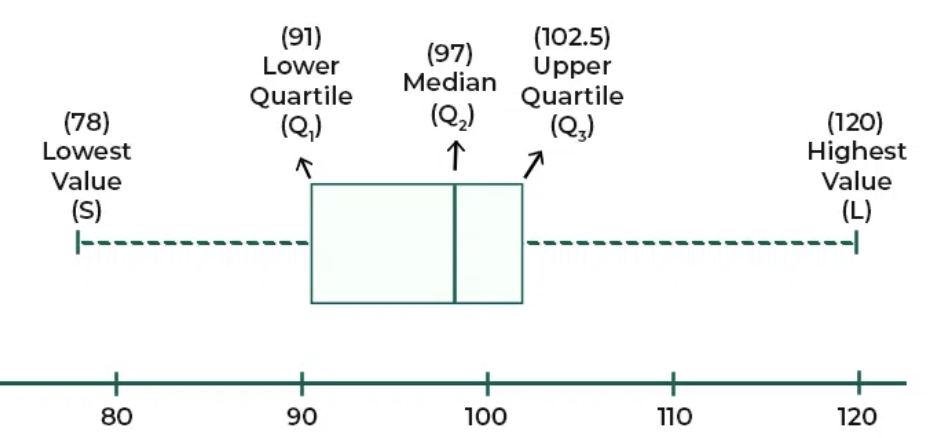

How to decide which are the outliers?

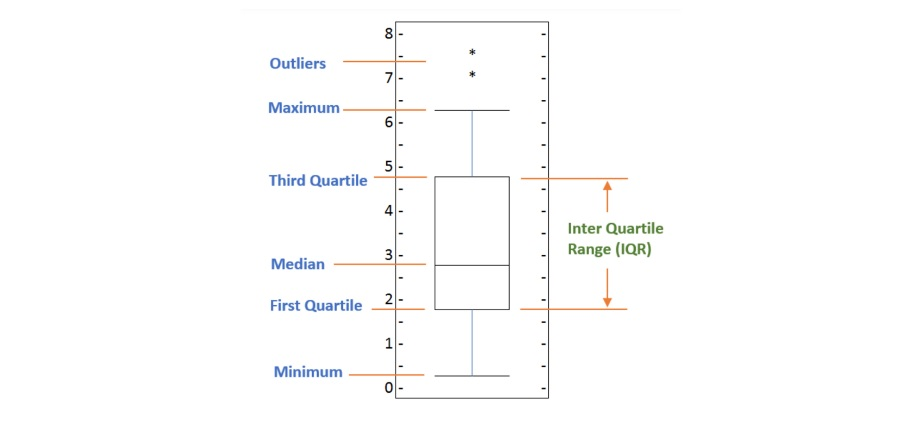

#### Inter-Quartile Range (IQR)

In [ ]:
num.describe()

In [ ]:
# outliers by inter-quartile range (IQR)
from typing import List
def remove_outliers(df, data: List, factor):
    q1 = data.quantile(.25)
    q3 = data.quantile(.75)
    IQR = q3 - q1
    # values smaller than 1.5 IQR below q1 and bigger that 1.5 IQR over q3 
    outliers = df[(data < (q1 - factor * IQR)) | (data > (q3 + factor * IQR))]
    df = df.drop(outliers.index, inplace=True)
    return df

In [ ]:
remove_outliers(dfb, dfb['værelser[num]'], 1.5)

In [ ]:
num.describe()

In [ ]:
dfb['pris[DKK]'].describe()

### Correlation

In [ ]:
dfb.columns

In [ ]:
corr = dfb.corr(method='pearson', numeric_only=True)

In [ ]:
corr

In [ ]:
# heat map
sbn.heatmap(corr, annot=True)

In [ ]:
dfb = dfb.drop(columns=['areal[kvm]', 'værelser[num]', 'alder[år]', 'pris[DKK]'])

In [ ]:
dfb.columns

### Scatter Correlation

In [ ]:
# scatter plots
from pandas.plotting import scatter_matrix

In [ ]:
num_cols = dfb.select_dtypes(include=["number"]).columns.tolist()
num_cols

In [ ]:
price_cols = dfb[['pris[DKK]scaled',	'alder[år]scaled',	'areal[kvm]scaled',	'værelser[num]scaled']]

In [ ]:
pd.plotting.scatter_matrix(price_cols, alpha=0.6)

### Interactive Geo-Mapping with Folium
[Folium](https://python-visualization.github.io/folium/latest/) is a data visualisatuion library with a support for images, video, GeoJSON and TopoJSON data formats.

In [ ]:
import folium
from folium import plugins
from folium.plugins import MousePosition

In [ ]:
url2 = 'https://raw.githubusercontent.com/foxdocs/dat-bi/refs/heads/main/Data/tab-map.csv'

In [ ]:
tabmap = pd.read_csv(url2)

In [ ]:
tabmap.head()

In [ ]:
# Lyngby
location=[55.77051, 12.51345]

In [ ]:
# create a map object and use it as background map, give central point and map style
mapa = folium.Map(location=location, tiles="OpenStreetMap", 
                  width="100%", height="100%", zoom_start=6)

In [ ]:
# see the coordinates of the mouse as you move it
MousePosition().add_to(mapa)
mapa

In [ ]:
# draw circle around Lyngby as a test demo
folium.Circle(radius=3000, location=location, popup="EK Lyngby",
              color='crimson', fill=False,).add_to(mapa)
mapa

In [ ]:
# add clusters (groups) of communes
locations = list(zip(tabmap.latitude, tabmap.longitude))
cluster = plugins.MarkerCluster(locations=locations, popups=tabmap["kommune"].tolist())  
mapa.add_child(cluster)
mapa

#### Alternative Visualisations

In [ ]:
# background map
mapa = folium.Map(location=location, tiles="OpenStreetMap",  width="100%", height="100%", zoom_start=6)

In [ ]:
# add circle markers
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=1).add_to(mapa)
mapa

In [ ]:
# add markers for properties per zipcode
for i,row in tabmap.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  icon = folium.Icon(color="green", icon='flag'),
                  tooltip = 'Click me!',
                  popup='kommune: ' + row['kommune'] 
                      +  '<br>' 
                      + 'region: ' + row['region']
                      +  '<br>' 
                      + str(row['address']) + ' boliger'
                 ).add_to(mapa)

In [ ]:
mapa

In [ ]:
minimap = plugins.MiniMap()
mapa.add_child(minimap)

In [ ]:
# save in file
tab.to_csv("/Users/tdi/Documents/GitHub/foxdocs/dat-bi/Data/dat-dfb.csv", index=False)

In [ ]:
# save in file
tabmap.to_csv("/Users/tdi/Documents/GitHub/foxdocs/dat-bi/Data/tab-map.csv", index=False)

In [ ]:
# Create a choropleth map
folium.Choropleth(geo_data='path/to/geojson_file.geojson', data=df, columns=['area', 'value'], key_on='feature.properties.name').add_to(m)

### Geo-Visualisation with Plotly

In [ ]:
fig = px.scatter_map(tabmap, lat="latitude", lon="longitude",  size="pris[DKK]", color="address",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=30, zoom=6)
fig.update_layout(height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=True, resolution=50, scope="europe",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(projection_type="orthographic")
fig.show()

In [ ]:

fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()